In [1]:
# 단 한번 설치한다.
#!pip install pandas-datareader

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pandas_datareader import data as dt
import warnings
warnings.filterwarnings("ignore")   # 성가신 warning을 꺼준다.
%matplotlib inline

### 1) 한국 증권 거래소(KRX)에서 종목관련 정보를 가져와 본다

In [3]:
df_krx = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', header=0)[0]
df_krx.head(5)    #한국증권거래소 krx

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
1,GS글로벌,1250,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서...",1976-06-26,12월,김태형,http://www.gsgcorp.com,서울특별시
2,HSD엔진,82740,일반 목적용 기계 제조업,"대형선박용엔진,내연발전엔진",2011-01-04,12월,고영열,http://www.doosanengine.com,경상남도
3,LG이노텍,11070,전자부품 제조업,기타 전자부품 제조업,2008-07-24,12월,정철동,http://www.lginnotek.co.kr,서울특별시
4,OCI,10060,기초 화학물질 제조업,"타르제품,카본블랙,무수프탈산,농약원제,석탄화학제품,정밀화학제품,플라스틱창호재 제조,판매",1985-07-09,12월,"백우석, 이우현, 김택중(3인, 각자 대표이사)",http://www.oci.co.kr,서울특별시


In [4]:
df_krx.shape

(2352, 9)

In [5]:
# 한국 증권 거래소 FULL 코드로 변환해 주는 함수.   # 종목코드가 수치면 안됨(수치형자료)->문자로 바꿔줘야 함
def transform_krx(x):                              #~.ks가 되도록 문자열로 변경(종목코드와 회사명 가져와서 변경)
    x_str = str(x)                                 # 6자리 맞추고 .ks로 끝나도록 함수 만듬(코드는 자리수가 다양해서 6자리로 맞춘것)
    n_padding = 6 - len(x_str)
    if n_padding > 0:                               
        x_str = '0'*n_padding + x_str
    return x_str + ".KS"

In [6]:
# 종목 코드와 이름만 가져온다.
stocks = df_krx[['종목코드','회사명']]
stocks['종목코드'] = df_krx['종목코드'].apply(lambda x: transform_krx(x))
stocks.head(5)

,종목코드,회사명
0,155660.KS,DSR
1,001250.KS,GS글로벌
2,082740.KS,HSD엔진
3,011070.KS,LG이노텍
4,010060.KS,OCI


In [7]:
# 회사명으로 소팅하여 출력.
stocks.sort_values(by='회사명').head(5)

,종목코드,회사명
1581,060310.KS,3S
899,095570.KS,AJ네트웍스
1774,006840.KS,AK홀딩스
392,054620.KS,APS홀딩스
2174,265520.KS,AP시스템


In [8]:
# 종목코드로 소팅하여 출력.
stocks.sort_values(by='종목코드').head(5)

,종목코드,회사명
933,000020.KS,동화약품
1489,000040.KS,KR모터스
1495,000050.KS,경방
1520,000060.KS,메리츠화재
37,000070.KS,삼양홀딩스


### 2) 삼성전자 데이터를 읽어온다

In [9]:
# 삼성전자.
my_code = stocks['종목코드'][stocks.회사명 == '삼성전자'].values[0]  #005930.ks 한국증권거래소의 삼성전자 종목코드임
my_code

'005930.KS'

In [10]:
# Yahoo 금융에서 데이터를 읽어온다.                                 
my_df1 = dt.DataReader(my_code,'yahoo','2019-01-01','2019-12-31')   
                                                                    

In [11]:
# 인덱스가 datetime 객체이다.     #1/1은 없고, 1/2시작                #칼럼은 6개
my_df1.head(5)                                                        #날짜가 인덱스로 들어감
                                                                      #open시장(오픈시 가격), adj close(수정된 종가)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39400.0,38550.0,39400.0,38750.0,7847664.0,38750.0
2019-01-03,38550.0,37450.0,38300.0,37600.0,12471493.0,37600.0
2019-01-04,37600.0,36850.0,37450.0,37450.0,14108958.0,37450.0
2019-01-07,38900.0,37800.0,38000.0,38750.0,12748997.0,38750.0
2019-01-08,39200.0,37950.0,38000.0,38100.0,12756554.0,38100.0


In [12]:
# 날짜로 인덱싱(2019.1.2에 해당하는 값을 가져옴)
my_df1.loc[datetime.date(2019,1,2)]        #인덱스이름이 0,1,2가 아닌 날짜임  
                                           #날짜객체를 인덱스이름으로 넣어서 인덱싱을 해야함
                                           #.loc해서 날짜객체넣으면 날짜에 해당하는 행을 가져옴

High           39400.0
Low            38550.0
Open           39400.0
Close          38750.0
Volume       7847664.0
Adj Close      38750.0
Name: 2019-01-02 00:00:00, dtype: float64

In [13]:
# 날짜로 인덱싱(2019.1.8에 해당하는 값을 가져옴)
my_df1.loc[datetime.date(2019,1,8)]

High            39200.0
Low             37950.0
Open            38000.0
Close           38100.0
Volume       12756554.0
Adj Close       38100.0
Name: 2019-01-08 00:00:00, dtype: float64

In [14]:
# 날짜로 슬라이싱(2019.1.2~2019.1.8에 해당하는 값)
my_df1.loc[datetime.date(2019,1,2):datetime.date(2019,1,8)]   #칼럼을 넣어서 범위를 정해줌

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39400.0,38550.0,39400.0,38750.0,7847664.0,38750.0
2019-01-03,38550.0,37450.0,38300.0,37600.0,12471493.0,37600.0
2019-01-04,37600.0,36850.0,37450.0,37450.0,14108958.0,37450.0
2019-01-07,38900.0,37800.0,38000.0,38750.0,12748997.0,38750.0
2019-01-08,39200.0,37950.0,38000.0,38100.0,12756554.0,38100.0


### 3) 시각화한다

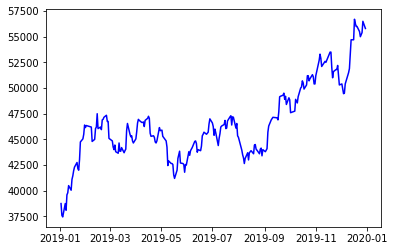

In [15]:
# 실제 값(수정 종가)로  
# "수정주가"를 Naver에서 검색해 본다!
x = my_df1.index
y = my_df1['Adj Close']
plt.plot(x,y,c='blue')
plt.show()

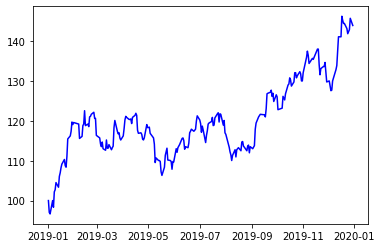

In [16]:
# 지수화 하여 시각화.
# 2019-1-2일 가격을 100이라 변환.
x = my_df1.index
y = my_df1['Adj Close']/my_df1.loc[datetime.date(2019,1,2)]['Adj Close']*100   #1/2을 100이라고 잡고 몇프로가 올랐는지 볼 수 있음
                                                                               #세로축은 지수화된 주식가격
plt.plot(x,y,c='blue')
plt.show()

### 4) SK하이닉스 데이터를 읽어와 삼성전자와 비교한다

In [17]:
# SK하이닉스
my_code = stocks['종목코드'][stocks.회사명 == 'SK하이닉스'].values[0]
my_code

'000660.KS'

In [18]:
# Yahoo 금융에서 데이터를 읽어온다.
my_df2 = dt.DataReader(my_code,'yahoo','2019-01-01','2019-12-31')

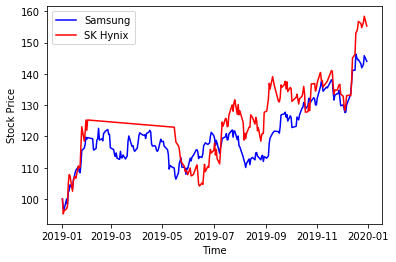

In [19]:
# 지수화 하여 두 개의 시계열을 서로 비교해 본다.
# 2019-1-2일 가격을 100이라 변환.
x1 = my_df1.index
y1 = my_df1['Adj Close']/my_df1.loc[datetime.date(2019,1,2)]['Adj Close']*100    #df1은 삼성 df2는 sk 합쳐서 확인해봄
x2 = my_df2.index                                                                #직선으로 쭉 나오는부분은 데이터누락
                                                                                 #1/2을 100으로 잡음, 실제값은 둘이 매우 다름 
y2 = my_df2['Adj Close']/my_df2.loc[datetime.date(2019,1,2)]['Adj Close']*100    #하지만 지수화 해서 같은 선상에서 시작(100에서 시작)
plt.plot(x1,y1,c='blue',label='Samsung',linestyle='-')                           
plt.plot(x2,y2,c='red',label='SK Hynix',linestyle='-')
plt.legend(loc='Upper Left')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

- 특정시점으로 몇프로 올랐는지 지수화해서 봐야한다
- 인덱스할 때는 날짜변환을 해줘야 날짜에 해당하는 값을 가져온다